In [91]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pairing_poisson_change_variance as pair
reload(pair)
%matplotlib inline

In [92]:
#number of stimulated neurons

N=1
#time constants
taul=0.01
taus=0.003
fac=(1./((taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
print(intepsquad)
dt=0.0005



# different input rates
low_rate=5.
high_rate=10.

#rate of post synaptic stimulation
post_rate=20.

#intitial weight (excitatory)
initial_weight=.05



#learning rate
lr=0.005

38.4615384615


In [93]:
parameter={
    "N":N,
    "taul":taul,
    "taus":taus,
    "dt":dt,
    "kernel":pair.eps,
    "intepsquad":intepsquad,
    "inteps":inteps,
    "rate":low_rate,
    "lr":lr,
    "rho":pair.sigmoidal,
    "rhoprime":pair.sigmoidalp,
    "threshold":10., #rest=-70, #center=-60 saturation around -50
    "slope":0.3,
    "maxfire":100.,
    "post_rate":post_rate,
    "g1":pair.g1,
    "g2":pair.g2,
    "f":pair.fsigmoid,
    "init":pair.init,
    "pre_learning_time":.5,
    "learning_time":5.,
    "interval_length":0.05,
    "total_time":5.5,
    "learning_rule":pair.ngradient,
    "percentage":1, #0 for absolute weight change plot, 1 for relative
    "label":("low variance","low rate","low tau")
    }

In [94]:
parameter["rate"]=high_rate
taul=0.015
taus=0.003
fac=(1./(parameter["rate"]*(taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
parameter["taul"]=taul
parameter["taus"]=taus
parameter["inteps"]=inteps
parameter["intepsquad"]=intepsquad
weight=initial_weight

In [95]:
hhweights,hhusp,hhspikes=pair.nlearning(weight,**parameter)
np.save("variance_hr_ht",hhweights)
np.save("usp_trace_hr_ht",hhusp)
np.save("spikes_hr_ht",hhspikes)

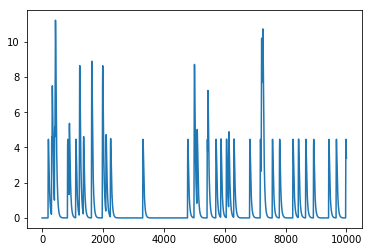

In [96]:
usp=np.load("usp_trace_hr_ht.npy")
plt.plot(usp[0])

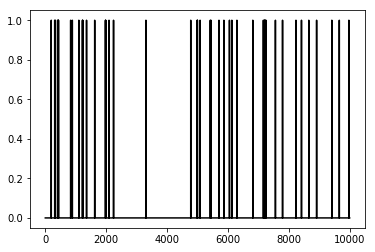

In [97]:
spikes=np.load("spikes_hr_ht.npy")
plt.plot(spikes[0],color="black")

In [98]:
parameter["rate"]=low_rate
taul=0.015
taus=0.003
fac=(1./(parameter["rate"]*(taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
parameter["taul"]=taul
parameter["taus"]=taus
parameter["inteps"]=inteps
parameter["intepsquad"]=intepsquad
weight=initial_weight

In [99]:
lhweights,lhusp,lhspikes=pair.nlearning(weight,**parameter)
np.save("variance_lr_ht",lhweights)
np.save("usp_trace_lr_ht",lhusp)
np.save("spikes_lr_ht",lhspikes)

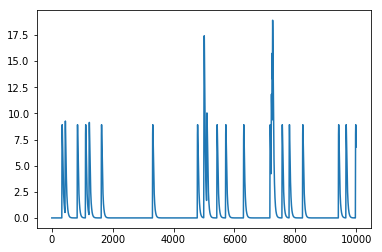

In [100]:
usp=np.load("usp_trace_lr_ht.npy")
plt.plot(usp[0])

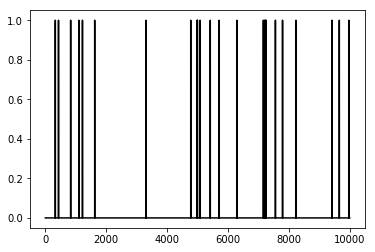

In [101]:
spikes=np.load("spikes_lr_ht.npy")
plt.plot(spikes[0],color="black")

In [102]:
parameter["rate"]=high_rate
taul=0.005
taus=0.003
fac=(1./(parameter["rate"]*(taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
parameter["taul"]=taul
parameter["taus"]=taus
parameter["inteps"]=inteps
parameter["intepsquad"]=intepsquad
weight=initial_weight

In [103]:
hlweights,hlusp,hlspikes=pair.nlearning(weight,**parameter)
np.save("variance_hr_lt",hlweights)
np.save("usp_trace_hr_lt",hlusp)
np.save("spikes_hr_lt",hlspikes)

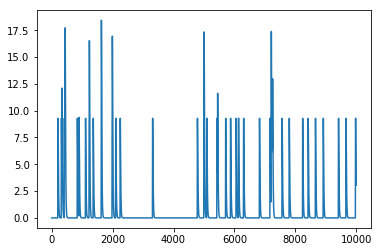

In [104]:
usp=np.load("usp_trace_hr_lt.npy")
plt.plot(usp[0])

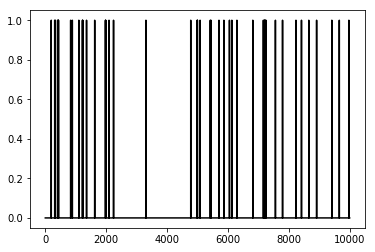

In [105]:
spikes=np.load("spikes_hr_lt.npy")
plt.plot(spikes[0],color="black")

In [106]:
weights=np.array((hhweights,lhweights,hlweights))

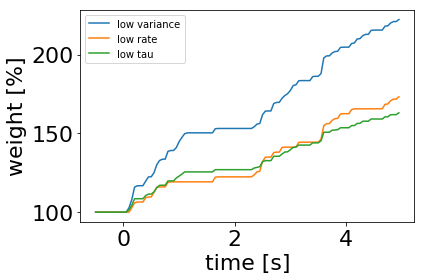

In [107]:
pair.plotLTP(weights,**parameter)


In [108]:
taul=0.015
taus=0.003
parameter["taul"]=taul
parameter["taus"]=taus
wfinal=np.zeros(20)
usp_variance=np.zeros(20)
r=np.arange(1.,21.,1.)
for i,item in enumerate(r):
    parameter["rate"]=item
    fac=(1./(parameter["rate"]*(taul-taus)))
    inteps=fac*(taul-taus)
    intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
    parameter["inteps"]=inteps
    parameter["intepsquad"]=intepsquad
    weight=initial_weight
    usp_variance[i]=intepsquad*item
    wfinal[i]=pair.nlearning(weight,**parameter)[0][-1:]
wfinal=(wfinal/initial_weight-1.)*100.
np.save("wfinal_rvar",wfinal)
np.save("usp_variance_rvar", usp_variance)

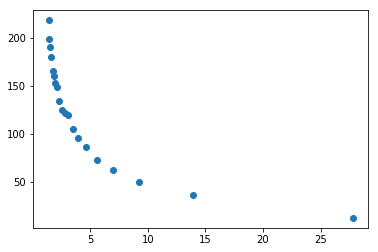

In [109]:
plt.scatter(usp_variance,wfinal)

In [110]:
taus=0.003
parameter["rate"]=high_rate
parameter["taus"]=taus
wfinal=np.zeros(9)
usp_variance=np.zeros(9)
tau=np.arange(0.005,0.0275,0.0025)
for i,item in enumerate(tau):
    print(i,item)
    taul=item
    parameter["taul"]=taul
    fac=(1./(parameter["rate"]*(taul-taus)))
    inteps=fac*(taul-taus)
    intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
    parameter["inteps"]=inteps
    parameter["intepsquad"]=intepsquad
    weight=initial_weight
    usp_variance[i]=intepsquad*parameter["rate"]
    wfinal[i]=pair.nlearning(weight,**parameter)[0][-1:]
wfinal=(wfinal/initial_weight-1.)*100.
np.save("wfinal_tvar",wfinal)
np.save("usp_variance_tvar", usp_variance)


(0, 0.005)
(1, 0.0075)
(2, 0.009999999999999998)
(3, 0.012499999999999999)
(4, 0.015)
(5, 0.017499999999999998)
(6, 0.019999999999999997)
(7, 0.0225)
(8, 0.024999999999999998)


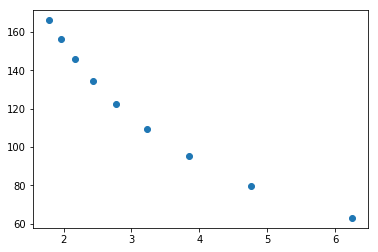

In [111]:
plt.scatter(usp_variance,wfinal)

In [112]:
wfinal_rvar=np.load("wfinal_rvar.npy")
wfinal_tvar=np.load("wfinal_tvar.npy")
var_rvar=np.load("usp_variance_rvar.npy")
var_tvar=np.load("usp_variance_tvar.npy")

In [113]:
wfinal_com=np.concatenate((wfinal_rvar,wfinal_tvar))
print(wfinal_com)
var_com=np.concatenate((var_rvar,var_tvar))
np.save("wfinal_com",wfinal_com)
np.save("usp_var_com",var_com)

[ 12.24735765  36.1509812   49.31327798  62.06877717  73.18940773
  86.05719485  95.96879784 105.35018335 119.2654535  122.21324208
 124.84824059 134.49016675 149.18587784 153.42316669 159.88830422
 165.95124938 180.63824982 190.33380494 199.45923787 218.49663884
  63.02432184  79.72428707  95.03705266 109.15164073 122.21324208
 134.34094658 145.63488574 156.18029359 166.05037923]


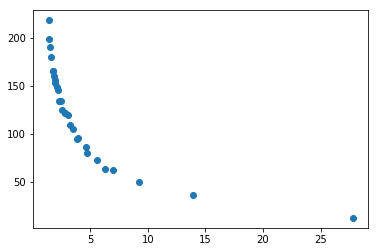

In [114]:
plt.scatter(var_com,wfinal_com)